In [1]:
import numpy as np
import matplotlib.pyplot as plt
%run IDM_helper_functions.ipynb

import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer

from sbi.inference import MNLE
from pyro.distributions import InverseGamma
from torch.distributions import Beta, Binomial, Gamma
from sbi.utils import MultipleIndependent

from sbi.inference import MCMCPosterior, VIPosterior, RejectionPosterior
from sbi.utils.torchutils import atleast_2d

from sbi.utils import mcmc_transform
from sbi.inference.potentials.base_potential import BasePotential

In [23]:
W_pos, W_neg = 52500, 8400
B1, B2 = 0, 0
N, theta = 2000, 51450

y1, y2 = 0.2, 0.2
beta=1/24
print(energy(y1,y2))
print(dEdy1(y1, y2, W_pos, W_neg, B1, theta))
print(dEdy2(y1,y2, W_pos, W_neg, B2, theta))
print(free_energy(y1,y2,N=2000))
print(dFdy1(y1,y2, W_pos, W_neg, B1, theta, beta, N))
print(dFdy2(y1,y2, W_pos, W_neg, B2, theta, beta, N))

16716.0
32130.0
32130.0
-7303.316329833018
-1141.064666877377
-1141.064666877377


In [25]:
# Training data
num_simulations = 100000
prior = utils.BoxUniform(low=[0,0.2,0.1,0.01], high=[0.8,0.6,0.6,0.1])
parameters = prior.sample((num_simulations,))
x = simul_IDM_EM(np.array(parameters))

In [26]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior)
trainer = trainer.append_simulations(parameters, x)
mnle = trainer.train()


 Neural network successfully converged after 32 epochs.

In [27]:
#
mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")

#mcmc_parameters=dict(init_strategy="resample", num_chains=10, warmup_steps=100)


mnle_posterior = trainer.build_posterior(mnle, prior)


In [17]:
# inference with different x_o that has 100 trials
torch.manual_seed(41)
num_trials = 200
num_samples = 100
parameters_o = prior.sample((1,))
x_o = simul_IDM_EM(np.array(parameters_o.repeat(num_trials, 1)))

In [18]:
mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

/Users/wangjiashun/Documents/GitHub/sbi/sbi/utils/sbiutils.py:321: UserWarning: An x with a batch size of 200 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  respect to entire batch, i.e,. p(theta | X)."""


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

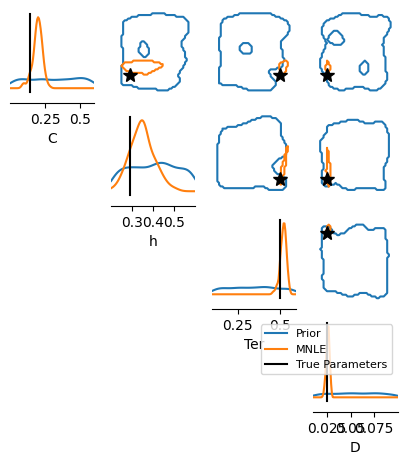

In [19]:
pair_plot(prior, mnle_samples, parameters_o, contour = 0.7, labels=['C', 'h','Ter', 'D'])

In [25]:
# inference with different x_o that has 100 trials
torch.manual_seed(41)
num_trials = 10
num_samples = 100
parameters_o = prior.sample((1,))
x_o = simul_IDM_EM(np.array(parameters_o.repeat(num_trials, 1)))

In [ ]:
mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

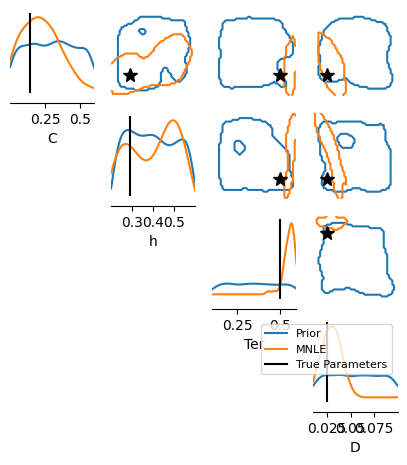

In [24]:
#pair_plot(prior, mnle_samples, parameters_o, 

pair_plot(prior, mnle_samples, parameters_o, contour = 0.7, labels=['C', 'h','Ter', 'D'])


In [28]:
# inference with different x_o that has 100 trials
torch.manual_seed(41)
num_trials = 200
num_samples = 100
parameters_o = prior.sample((1,))
x_o = simul_IDM_EM(np.array(parameters_o.repeat(num_trials, 1)))

mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

/Users/wangjiashun/Documents/GitHub/sbi/sbi/utils/sbiutils.py:321: UserWarning: An x with a batch size of 200 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  respect to entire batch, i.e,. p(theta | X)."""


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

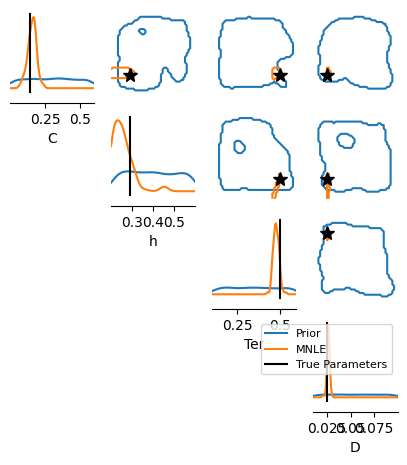

In [30]:
pair_plot(prior, mnle_samples, parameters_o, contour = 0.7, labels=['C', 'h','Ter', 'D'])

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

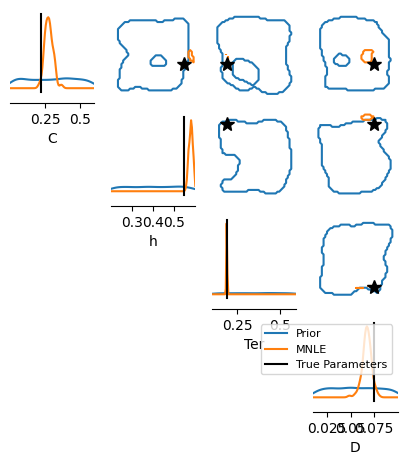

In [31]:
# inference with different x_o that has 100 trials
torch.manual_seed(40)
num_trials = 200
num_samples = 100
parameters_o = prior.sample((1,))
x_o = simul_IDM_EM(np.array(parameters_o.repeat(num_trials, 1)))

mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

pair_plot(prior, mnle_samples, parameters_o, contour = 0.7, labels=['C', 'h','Ter', 'D'])

/Users/wangjiashun/Documents/GitHub/sbi/sbi/utils/sbiutils.py:321: UserWarning: An x with a batch size of 300 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  respect to entire batch, i.e,. p(theta | X)."""


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

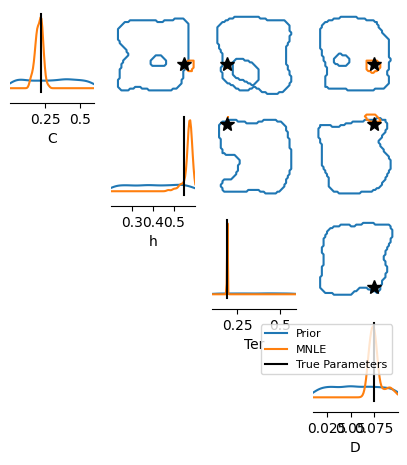

In [32]:
# inference with different x_o that has 100 trials
torch.manual_seed(40)
num_trials = 300
num_samples = 100
parameters_o = prior.sample((1,))
x_o = simul_IDM_EM(np.array(parameters_o.repeat(num_trials, 1)))

mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

pair_plot(prior, mnle_samples, parameters_o, contour = 0.7, labels=['C', 'h','Ter', 'D'])

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

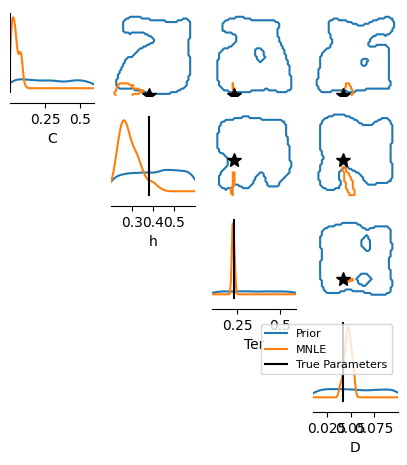

In [33]:
# inference with different x_o that has 100 trials
torch.manual_seed(39)
num_trials = 300
num_samples = 100
parameters_o = prior.sample((1,))
x_o = simul_IDM_EM(np.array(parameters_o.repeat(num_trials, 1)))

mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

pair_plot(prior, mnle_samples, parameters_o, contour = 0.7, labels=['C', 'h','Ter', 'D'])

/Users/wangjiashun/Documents/GitHub/sbi/sbi/utils/sbiutils.py:321: UserWarning: An x with a batch size of 300 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  respect to entire batch, i.e,. p(theta | X)."""


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

/Users/wangjiashun/Documents/GitHub/sbi/sbi/analysis/plot.py:425: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],


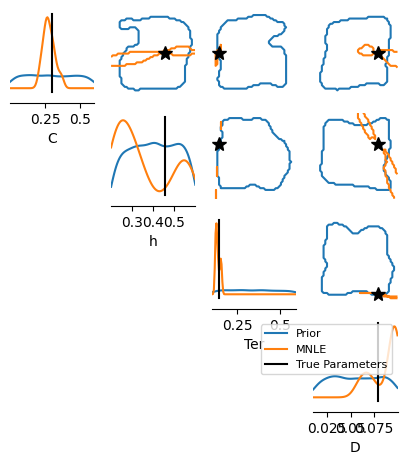

In [6]:
# inference with different x_o that has 100 trials
torch.manual_seed(38)
num_trials = 300
num_samples = 100
parameters_o = prior.sample((1,))
x_o = simul_IDM_EM(np.array(parameters_o.repeat(num_trials, 1)))

mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

pair_plot(prior, mnle_samples, parameters_o, contour = 0.7, labels=['C', 'h','Ter', 'D'])

## Simulate from DDM and fit from IDM from my code


In [6]:
Vs = np.random.uniform(low=0, high=4, size=30)
As = np.random.uniform(low=0.4, high=1, size=30)
Ters = np.random.uniform(low=0.2, high=0.8, size=30)


n_trials = 500
num_samples = 100
par_fitted = np.zeros((30,4))

In [7]:
for i in range(len(Vs)):
    print(i)
    v,a,ter = Vs[i], As[i], Ters[i]
    DDM_o = simul_DDM(np.tile((Vs[i], As[i], Ters[i]), (n_trials,1)), c = 0.1) # simulate IDM data 0.1**0.5
    
    #prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.5,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(DDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted[i,:] = np.array(mnle_map)
    
    

0


/Users/wangjiashun/Documents/GitHub/sbi/sbi/utils/sbiutils.py:321: UserWarning: An x with a batch size of 500 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  respect to entire batch, i.e,. p(theta | X)."""


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
Optimization was interrupted after 655 iterations. 
27


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/wangjiashun/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_41501/889413595.py", line 4, in <module>
    DDM_o = simul_DDM(np.tile((Vs[i], As[i], Ters[i]), (n_trials,1)), c = 0.1) # simulate IDM data 0.1**0.5
  File "/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_41501/2491430338.py", line 16, in simul_DDM
    dW = np.random.normal()*np.sqrt(dt)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/wangjiashun/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling o

TypeError: object of type 'NoneType' has no len()

Text(0, 0.5, 'ter')

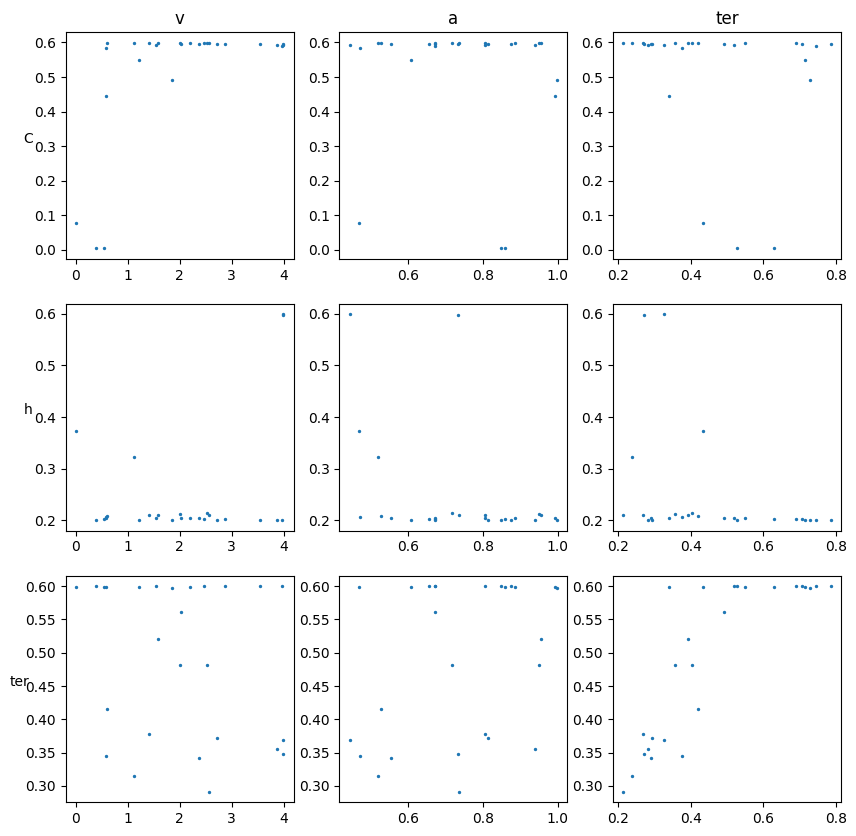

In [8]:
sim_num = 26
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Vs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Ters[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Vs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Ters[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Vs[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Ters[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("v")
ax2.set_title("a")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)

In [28]:
Vs = np.random.uniform(low=0, high=4, size=30)
As = np.random.uniform(low=0.6, high=2, size=30)
Ters = np.random.uniform(low=0.2, high=0.6, size=30)


n_trials = 1000
num_samples = 100
par_fitted = np.zeros((30,4))

In [29]:
for i in range(len(Vs)):
    print(i)
    v,a,ter = Vs[i], As[i], Ters[i]
    DDM_o = simul_DDM(np.tile((Vs[i], As[i], Ters[i]), (n_trials,1)), c = 1) # simulate IDM data 0.1**0.5
    
    #prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.5,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(DDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted[i,:] = np.array(mnle_map)

17


/Users/wangjiashun/Documents/GitHub/sbi/sbi/utils/sbiutils.py:321: UserWarning: An x with a batch size of 1000 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  respect to entire batch, i.e,. p(theta | X)."""


18
19
20
21
22
23
24
25
26
27
28
29


Text(0, 0.5, 'ter')

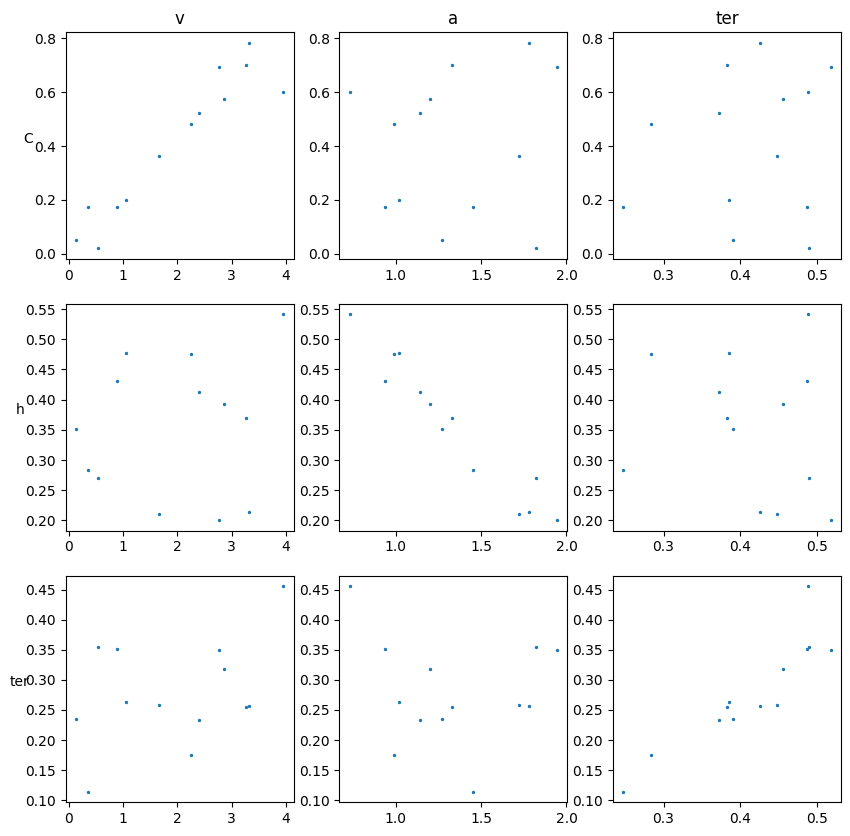

In [33]:
sim_num = 30
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Vs[17:sim_num], par_fitted[17:sim_num,0], s = 2)
ax2.scatter(As[17:sim_num], par_fitted[17:sim_num,0], s = 2)
ax3.scatter(Ters[17:sim_num], par_fitted[17:sim_num,0], s = 2)
ax4.scatter(Vs[17:sim_num], par_fitted[17:sim_num,1], s = 2)
ax5.scatter(As[17:sim_num], par_fitted[17:sim_num,1], s = 2)
ax6.scatter(Ters[17:sim_num], par_fitted[17:sim_num,1], s = 2)
ax7.scatter(Vs[17:sim_num], par_fitted[17:sim_num,2], s = 2)
ax8.scatter(As[17:sim_num], par_fitted[17:sim_num,2], s = 2)
ax9.scatter(Ters[17:sim_num], par_fitted[17:sim_num,2], s = 2)

ax1.set_title("v")
ax2.set_title("a")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)

Text(0, 0.5, 'sigma')

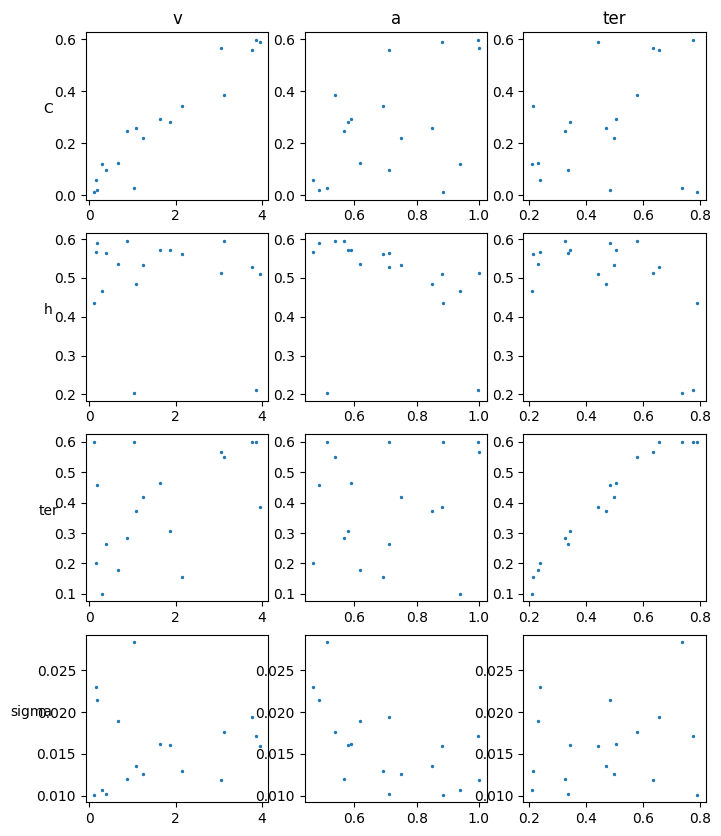

In [13]:
# prior = utils.BoxUniform(low=[0.01,0.2,0.1,0.001], high=[0.4,0.6,0.8,0.1])

sim_num = 18
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9),(ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(8,10))

ax1.scatter(Vs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Ters[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Vs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Ters[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Vs[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Ters[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax10.scatter(Vs[0:sim_num], par_fitted[0:sim_num,3], s = 2)
ax11.scatter(As[0:sim_num], par_fitted[0:sim_num,3], s = 2)
ax12.scatter(Ters[0:sim_num], par_fitted[0:sim_num,3], s = 2)

ax1.set_title("v")
ax2.set_title("a")
ax3.set_title("ter")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("ter", rotation=0)
ax10.set_ylabel("sigma", rotation=0)